In [1]:
from __future__ import print_function, division

from keras.layers import Input, Dense, Flatten, Dropout, Reshape
from keras.layers import BatchNormalization, Activation, Conv2D, Conv2DTranspose
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Model
from keras.optimizers import Adam

from keras.datasets import cifar10
import keras.backend as K

import matplotlib.pyplot as plt

import sys
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


In [0]:
def get_generator(input_layer):
  '''
  Requires the input layer as input, outputs the model and the final layer
  '''
  
  hid = Dense(128 * 16 * 16, activation='relu')(input_layer)    
  hid = BatchNormalization(momentum=0.9)(hid)
  hid = LeakyReLU(alpha=0.1)(hid)
  hid = Reshape((16, 16, 128))(hid)

  hid = Conv2D(128, kernel_size=5, strides=1,padding='same')(hid)
  hid = BatchNormalization(momentum=0.9)(hid)    
  #hid = Dropout(0.5)(hid)
  hid = LeakyReLU(alpha=0.1)(hid)

  hid = Conv2DTranspose(128, 4, strides=2, padding='same')(hid)
  hid = BatchNormalization(momentum=0.9)(hid)
  hid = LeakyReLU(alpha=0.1)(hid)

  hid = Conv2D(128, kernel_size=5, strides=1, padding='same')(hid)
  hid = BatchNormalization(momentum=0.9)(hid)
  #hid = Dropout(0.5)(hid)
  hid = LeakyReLU(alpha=0.1)(hid)

  hid = Conv2D(128, kernel_size=5, strides=1, padding='same')(hid)
  hid = BatchNormalization(momentum=0.9)(hid)
  hid = LeakyReLU(alpha=0.1)(hid)
                      
  hid = Conv2D(3, kernel_size=5, strides=1, padding="same")(hid)
  out = Activation("tanh")(hid)

  model = Model(input_layer, out)
  model.summary()
  
  return model, out


In [0]:
def get_discriminator(input_layer):
  '''
  Requires the input layer as input, outputs the model and the final layer
  '''

  hid = Conv2D(128, kernel_size=3, strides=1, padding='same')(input_layer)
  hid = BatchNormalization(momentum=0.9)(hid)
  hid = LeakyReLU(alpha=0.1)(hid)

  hid = Conv2D(128, kernel_size=4, strides=2, padding='same')(hid)
  hid = BatchNormalization(momentum=0.9)(hid)
  hid = LeakyReLU(alpha=0.1)(hid)

  hid = Conv2D(128, kernel_size=4, strides=2, padding='same')(hid)
  hid = BatchNormalization(momentum=0.9)(hid)
  hid = LeakyReLU(alpha=0.1)(hid)

  hid = Conv2D(128, kernel_size=4, strides=2, padding='same')(hid)
  hid = BatchNormalization(momentum=0.9)(hid)
  hid = LeakyReLU(alpha=0.1)(hid)

  hid = Flatten()(hid)
  hid = Dropout(0.4)(hid)
  out = Dense(1, activation='sigmoid')(hid)

  model = Model(input_layer, out)

  model.summary()

  return model, out

In [0]:
from keras.preprocessing import image

def generate_noise(n_samples, noise_dim):
  X = np.random.normal(0, 1, size=(n_samples, noise_dim))
  return X

def show_imgs(batchidx):
  noise = generate_noise(10, 100)
  gen_imgs = generator.predict(noise)

  fig, axs = plt.subplots(2, 5)
  count = 0
  for i in range(2):
    for j in range(5):
      # Dont scale the images back, let keras handle it
      img = image.array_to_img(gen_imgs[count], scale=True)
      axs[i,j].imshow(img)
      axs[i,j].axis('off')
      count += 1
  plt.show()
  plt.close()  

In [5]:
# GAN creation
img_input = Input(shape=(32,32,3))
discriminator, disc_out = get_discriminator(img_input)
discriminator.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy', metrics=['accuracy'])

discriminator.trainable = False

noise_input = Input(shape=(100,))
generator, gen_out = get_generator(noise_input)

gan_input = Input(shape=(100,))
x = generator(gan_input)
gan_out = discriminator(x)
gan = Model(gan_input, gan_out)
gan.summary()

gan.compile(optimizer=Adam(0.0002, 0.5), loss='binary_crossentropy',metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 128)       3584      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 128)       512       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       262272    
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 128)       512       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 16, 16, 128)       0         
__________

In [6]:

BATCH_SIZE = 16

# # Get training images
(X_train, y_train), (X_test, _) = cifar10.load_data()

# Select Cars
X_train = X_train[y_train[:,0]==1]
print ("Training shape: {}".format(X_train.shape))

# Normalize data
X_train = (X_train - 127.5) / 127.5
 
num_batches = int(X_train.shape[0]/BATCH_SIZE)

Training shape: (5000, 32, 32, 3)


/usr/local/lib/python2.7/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


  Epoch: 1, Generator Loss: 1.56265996373, Discriminator Loss: [0.3294763 0.       ]


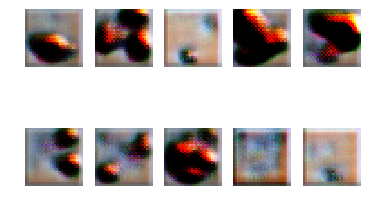

  Epoch: 2, Generator Loss: 1.64614718983, Discriminator Loss: [0.34755358 0.        ]


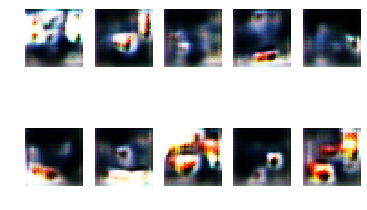

  Epoch: 3, Generator Loss: 1.46563993566, Discriminator Loss: [0.40829653 0.        ]


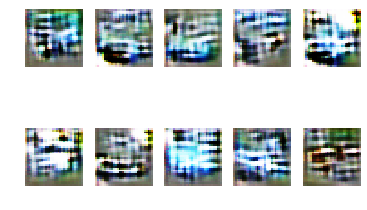

  Epoch: 4, Generator Loss: 1.35759620999, Discriminator Loss: [0.3853862 0.       ]


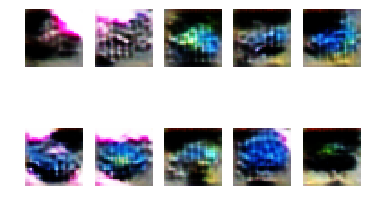

  Epoch: 5, Generator Loss: 1.30868695624, Discriminator Loss: [0.38914692 0.        ]


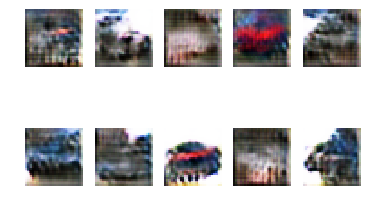

  Epoch: 6, Generator Loss: 1.42103936994, Discriminator Loss: [0.43991 0.     ]


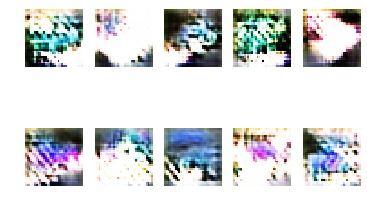

  Epoch: 7, Generator Loss: 1.45882608313, Discriminator Loss: [0.39861116 0.        ]


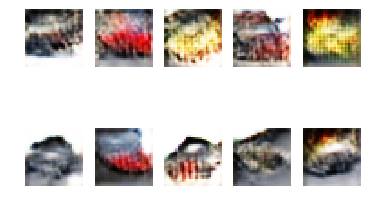

  Epoch: 8, Generator Loss: 1.37448096334, Discriminator Loss: [0.45455366 0.        ]


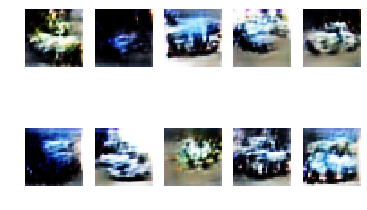

  Epoch: 9, Generator Loss: 1.22014586046, Discriminator Loss: [0.4094762 0.       ]


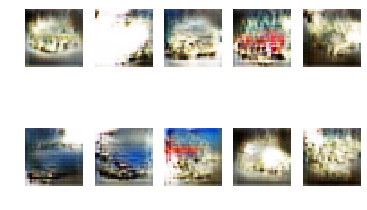

  Epoch: 10, Generator Loss: 1.39988117698, Discriminator Loss: [0.44394273 0.        ]


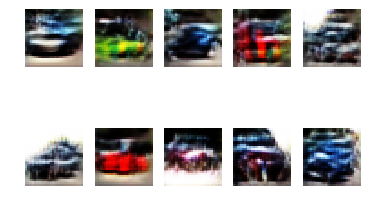

  Epoch: 11, Generator Loss: 1.11623116691, Discriminator Loss: [0.45782056 0.        ]


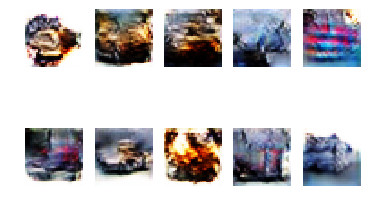

  Epoch: 12, Generator Loss: 1.04912866463, Discriminator Loss: [0.4914273 0.       ]


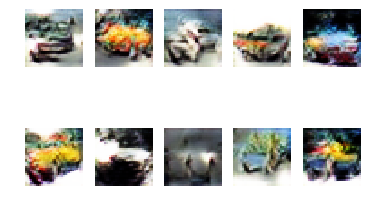

  Epoch: 13, Generator Loss: 1.27758612947, Discriminator Loss: [0.47346696 0.        ]


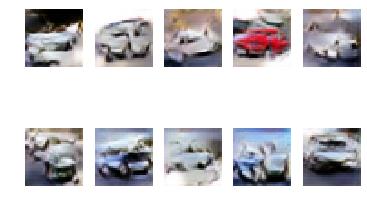

  Epoch: 14, Generator Loss: 1.15946554111, Discriminator Loss: [0.5203208 0.       ]


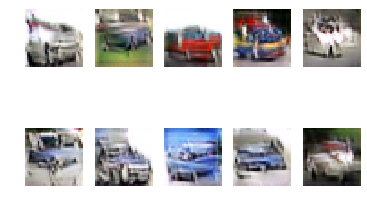

  Epoch: 15, Generator Loss: 0.99631485577, Discriminator Loss: [0.4998591 0.       ]


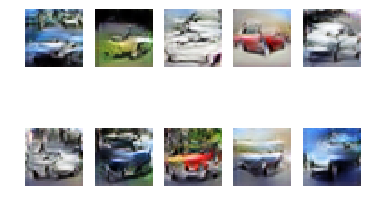

  Epoch: 16, Generator Loss: 1.06931240467, Discriminator Loss: [0.5032236 0.       ]


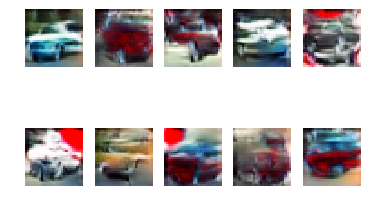

  Epoch: 17, Generator Loss: 1.24930187463, Discriminator Loss: [0.46533486 0.        ]


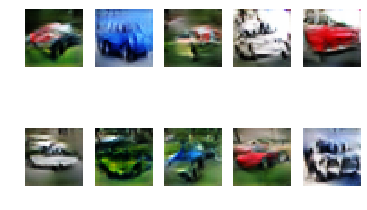

  Epoch: 18, Generator Loss: 1.25749878881, Discriminator Loss: [0.5538054 0.       ]


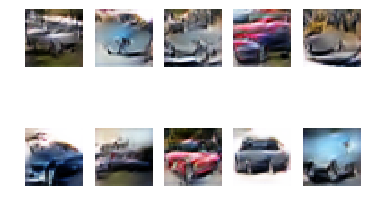

  Epoch: 19, Generator Loss: 1.20138423651, Discriminator Loss: [0.52517045 0.        ]


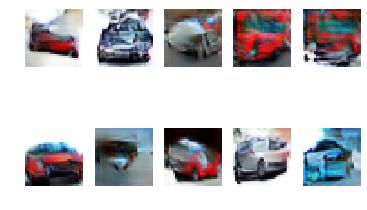

  Epoch: 20, Generator Loss: 1.14581083745, Discriminator Loss: [0.5242667 0.       ]


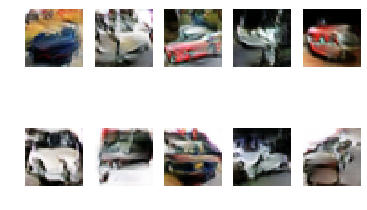

  Epoch: 21, Generator Loss: 1.11658638744, Discriminator Loss: [0.56554615 0.        ]


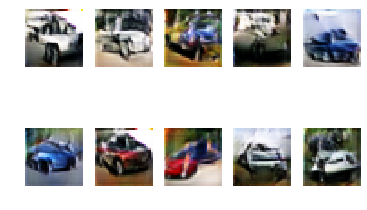

  Epoch: 22, Generator Loss: 1.06092944651, Discriminator Loss: [0.5283409 0.       ]


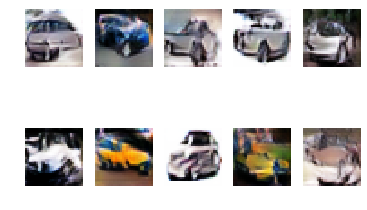

  Epoch: 23, Generator Loss: 1.12188535986, Discriminator Loss: [0.5630689 0.       ]


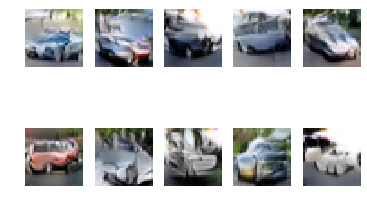

  Epoch: 24, Generator Loss: 1.17169816916, Discriminator Loss: [0.56588495 0.        ]


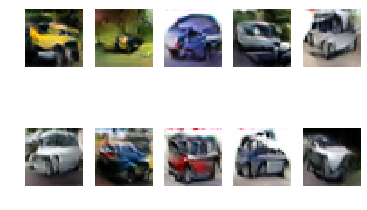

  Epoch: 25, Generator Loss: 1.09442396132, Discriminator Loss: [0.52922416 0.        ]


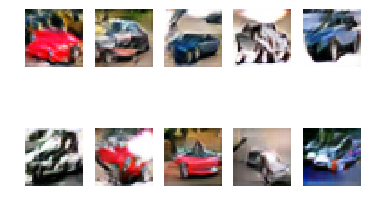

  Epoch: 26, Generator Loss: 1.02130417927, Discriminator Loss: [0.51421374 0.        ]


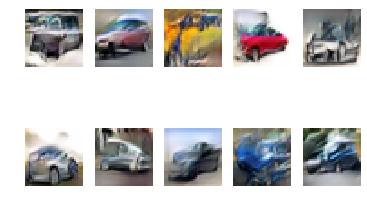

  Epoch: 27, Generator Loss: 1.13098759854, Discriminator Loss: [0.5397896 0.       ]


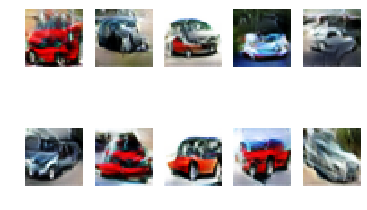

  Epoch: 28, Generator Loss: 1.15043013342, Discriminator Loss: [0.51847994 0.        ]


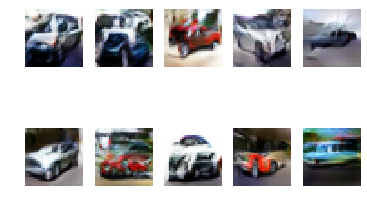

  Epoch: 29, Generator Loss: 1.08881876828, Discriminator Loss: [0.5097144 0.       ]


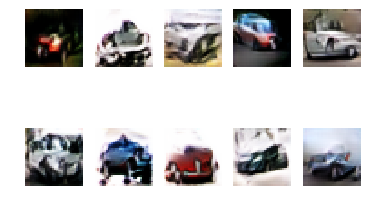

  Epoch: 30, Generator Loss: 1.05235162855, Discriminator Loss: [0.5006114 0.       ]


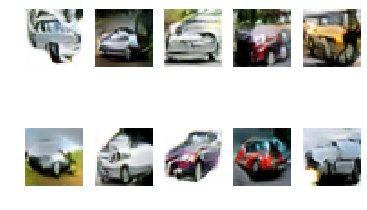

  Epoch: 31, Generator Loss: 1.10492455759, Discriminator Loss: [0.49425772 0.        ]


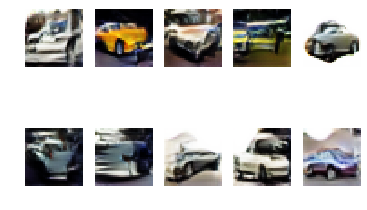

  Epoch: 32, Generator Loss: 1.23412929179, Discriminator Loss: [0.5179991 0.       ]


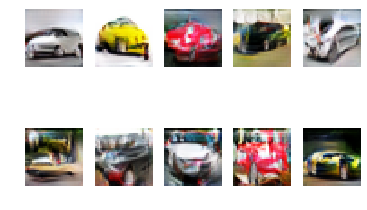

  Epoch: 33, Generator Loss: 1.21085216353, Discriminator Loss: [0.510265 0.      ]


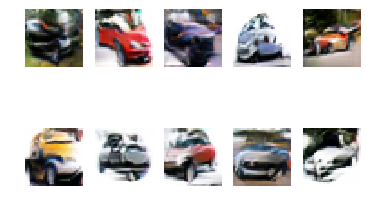

  Epoch: 34, Generator Loss: 1.29300846045, Discriminator Loss: [0.5091985 0.       ]


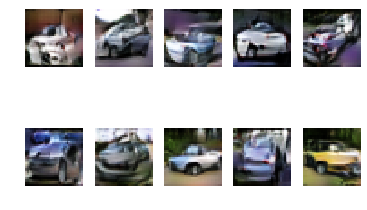

  Epoch: 35, Generator Loss: 1.19753592815, Discriminator Loss: [0.48523298 0.        ]


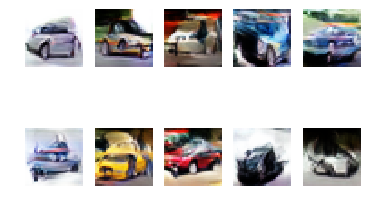

  Epoch: 36, Generator Loss: 1.27542603255, Discriminator Loss: [0.47833925 0.        ]


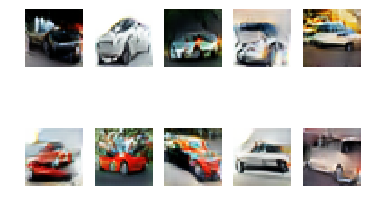

  Epoch: 37, Generator Loss: 1.29760524888, Discriminator Loss: [0.4751063 0.       ]


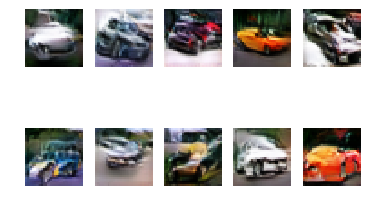

  Epoch: 38, Generator Loss: 1.32940032266, Discriminator Loss: [0.4646296 0.       ]


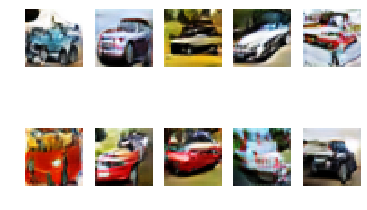

  Epoch: 39, Generator Loss: 1.35793843378, Discriminator Loss: [0.4716391 0.       ]


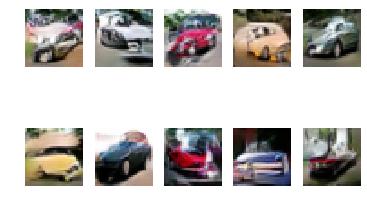

  Epoch: 40, Generator Loss: 1.42921762722, Discriminator Loss: [0.47364616 0.        ]


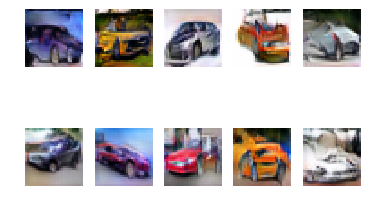

  Epoch: 41, Generator Loss: 1.46452337427, Discriminator Loss: [0.46241698 0.        ]


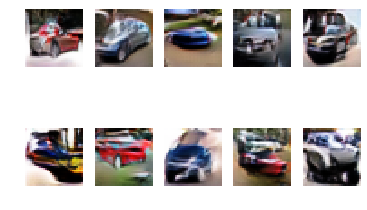

  Epoch: 42, Generator Loss: 1.58037616618, Discriminator Loss: [0.46179977 0.        ]


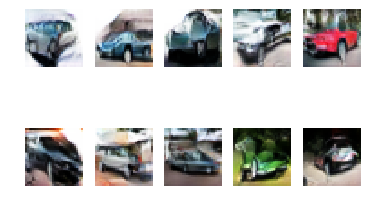

  Epoch: 43, Generator Loss: 1.48018447921, Discriminator Loss: [0.44434372 0.        ]


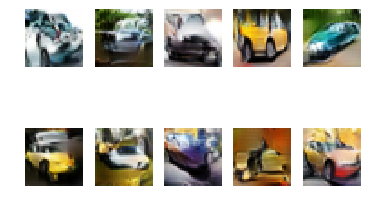

  Epoch: 44, Generator Loss: 1.52487523625, Discriminator Loss: [0.4448875 0.       ]


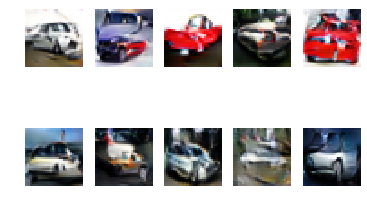

  Epoch: 45, Generator Loss: 1.6246118195, Discriminator Loss: [0.45360518 0.        ]


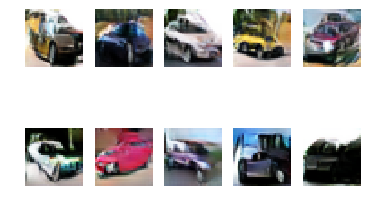

  Epoch: 46, Generator Loss: 1.65325008161, Discriminator Loss: [0.43896303 0.        ]


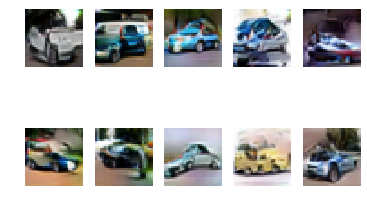

  Epoch: 47, Generator Loss: 1.71127730436, Discriminator Loss: [0.44803146 0.        ]


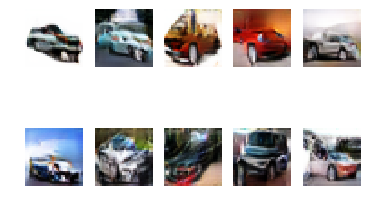

  Epoch: 48, Generator Loss: 1.68859770159, Discriminator Loss: [0.4279474 0.       ]


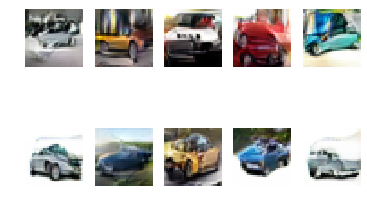

  Epoch: 49, Generator Loss: 1.73894377206, Discriminator Loss: [0.4238316 0.       ]


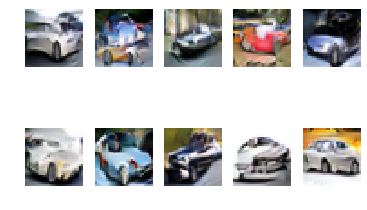

  Epoch: 50, Generator Loss: 1.79034525156, Discriminator Loss: [0.42291147 0.        ]


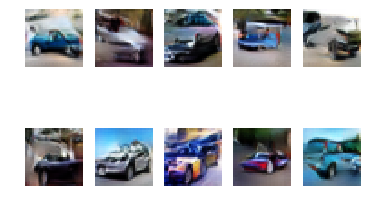

  Epoch: 51, Generator Loss: 1.80037845366, Discriminator Loss: [0.4251819 0.       ]


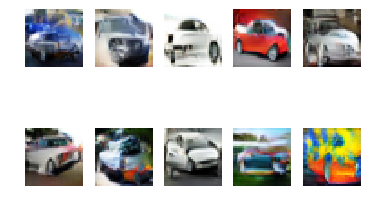

  Epoch: 52, Generator Loss: 1.95666738428, Discriminator Loss: [0.40321615 0.        ]


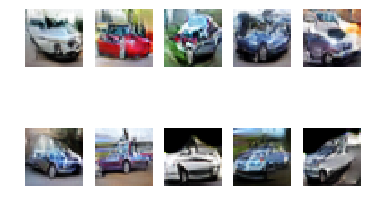

  Epoch: 53, Generator Loss: 1.96087702345, Discriminator Loss: [0.38631076 0.        ]


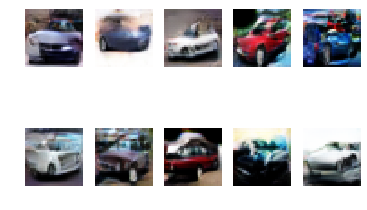

  Epoch: 54, Generator Loss: 2.08066750432, Discriminator Loss: [0.39514807 0.        ]


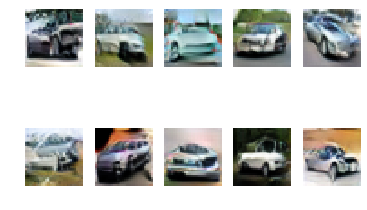

  Epoch: 55, Generator Loss: 2.15645895077, Discriminator Loss: [0.38795963 0.        ]


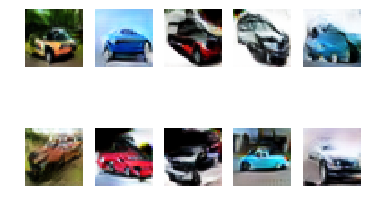

  Epoch: 56, Generator Loss: 2.1468530047, Discriminator Loss: [0.37345612 0.        ]


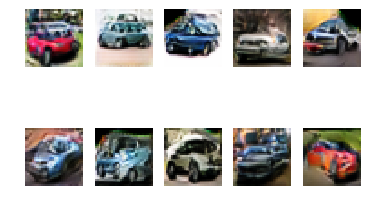

  Epoch: 57, Generator Loss: 2.10232668122, Discriminator Loss: [0.37775505 0.        ]


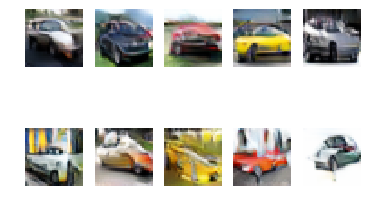

  Epoch: 58, Generator Loss: 2.18475778, Discriminator Loss: [0.38468775 0.        ]


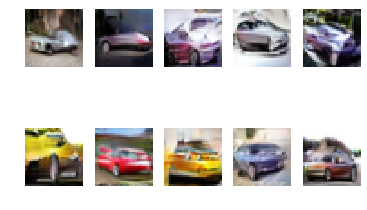

  Epoch: 59, Generator Loss: 2.14003495987, Discriminator Loss: [0.4078969 0.       ]


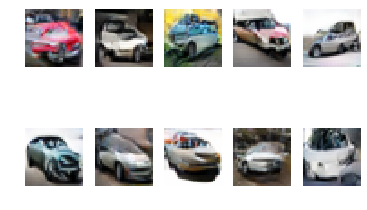

  Epoch: 60, Generator Loss: 2.148402373, Discriminator Loss: [0.38871503 0.        ]


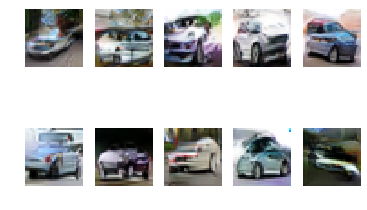

In [7]:
N_EPOCHS = 60
for epoch in range(N_EPOCHS):

  cum_d_loss = 0.
  cum_g_loss = 0.
  disc_Loss = []
  gen_Loss = []
  gen_acc = []
  for batch_idx in range(num_batches):
    # Get the next set of real images to be used in this iteration
    images = X_train[batch_idx*BATCH_SIZE : (batch_idx+1)*BATCH_SIZE]

    noise_data = generate_noise(BATCH_SIZE, 100)
    generated_images = generator.predict(noise_data)

    # Train on soft labels (add noise to labels as well)
    noise_prop = 0.05 # Randomly flip 5% of labels
    
    # Prepare labels for real data
    true_labels = np.zeros((BATCH_SIZE, 1)) + np.random.uniform(low=0.0, high=0.1, size=(BATCH_SIZE, 1))
    flipped_idx = np.random.choice(np.arange(len(true_labels)), size=int(noise_prop*len(true_labels)))
    true_labels[flipped_idx] = 1 - true_labels[flipped_idx]
    
    # Train discriminator on real data
    d_loss_true = discriminator.train_on_batch(images, true_labels)

    # Prepare labels for generated data
    gene_labels = np.ones((BATCH_SIZE, 1)) - np.random.uniform(low=0.0, high=0.1, size=(BATCH_SIZE, 1))
    flipped_idx = np.random.choice(np.arange(len(gene_labels)), size=int(noise_prop*len(gene_labels)))
    gene_labels[flipped_idx] = 1 - gene_labels[flipped_idx]
    
    # Train discriminator on generated data
    d_loss_gene = discriminator.train_on_batch(generated_images, gene_labels)

    d_loss = 0.5 * np.add(d_loss_true, d_loss_gene)
    cum_d_loss += d_loss

    # Train generator
    noise_data = generate_noise(BATCH_SIZE, 100)
    g_loss = gan.train_on_batch(noise_data, np.zeros((BATCH_SIZE, 1)))
    cum_g_loss += g_loss[0]
    gen_Loss.append(g_loss[0])
    gen_acc.append(g_loss[1])
    disc_Loss.append(d_loss[0])


  print('  Epoch: {}, Generator Loss: {}, Discriminator Loss: {}'.format(epoch+1, cum_g_loss/num_batches, cum_d_loss/num_batches))
  show_imgs("epoch" + str(epoch))


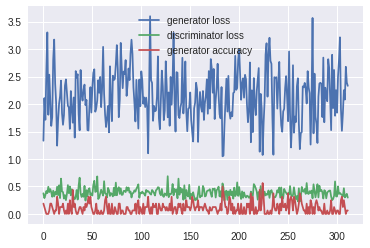

In [9]:
plt.plot(gen_Loss, label = 'generator loss')
plt.plot(disc_Loss, label = 'discriminator loss')
plt.plot(gen_acc, label = 'generator accuracy')
plt.show
plt.legend()